<a href="https://colab.research.google.com/github/faranak-jahedi/CryptoDataset/blob/main/Diabetes_parta(1)_FJB_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Gathering and Import


In [ ]:
#Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import tarfile
import urllib
import logging

from functools import reduce

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



### Gathering and Importing Data

We need some functions to help automate the large number of files

In [ ]:
def download_data(data_dir, file_list):

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    for (year, data_file) in file_list:
        sub_dir = os.path.join(data_dir, year)
        if not os.path.exists(sub_dir):
            os.makedirs(sub_dir)
        url = 'http://wwwn.cdc.gov/Nchs/Nhanes/{0}/{1}.XPT'.format(year, data_file)
        file_name = os.path.join(sub_dir, data_file + '.XPT')
        if not os.path.exists(file_name):
            logging.info('Downloading: {}'.format(url))
            urllib.request.urlretrieve(url, file_name)
        else:
            logging.info('File exists: {}'.format(file_name))

def read_data_from_row(offset,ncols,col_list):
    df = pd.DataFrame()
    for i in range(ncols):
        # sample filename: LOCAL_DATA_PATH/2015-2016/DEMO_I.XPT
        # note: Per nhanes style guide, 2013-2014 is _H, 2015-2016 is _I, etc. we could probably save them all to the same directory and use string match of "_J" to select 2017-2018 data.
        filename = LOCAL_DATA_PATH + file_list[offset + i][0] + "/" + file_list[offset + i][1] + ".XPT"
        one_year_df = pd.read_sas(filename)
        df = pd.concat([df,one_year_df], axis=0)
    df = df.loc[:, col_list]
    return df

In [ ]:
# file_list looks like a 2d array, but it's a 1d array. the number of "cols" here is ncols in read_data_from_row
# this list and read_data_from_row could be refactored to not make this assumption and be more human-readable
file_list = [

        ('2015-2016', 'DEMO_I'),    ('2017-2018', 'DEMO_J'),  ('2013-2014', 'DEMO_H'),
        ('2015-2016', 'BPX_I'),     ('2017-2018', 'BPX_J'),   ('2013-2014', 'BPX_H'),
        ('2015-2016', 'BMX_I'),     ('2017-2018', 'BMX_J') ,  ('2013-2014', 'BMX_H'),
        ('2015-2016', 'TCHOL_I'),   ('2017-2018', 'TCHOL_J'), ('2013-2014', 'TCHOL_H'),
        ('2015-2016', 'DIQ_I'),     ('2017-2018', 'DIQ_J'),   ('2013-2014', 'DIQ_H'),
        ('2015-2016', 'SMQ_I'),     ('2017-2018', 'SMQ_J'),   ('2013-2014', 'SMQ_H'),
        ('2015-2016', 'MCQ_I'),     ('2017-2018', 'MCQ_J'),   ('2013-2014', 'MCQ_H'),
        ('2015-2016', 'HDL_I'),     ('2017-2018', 'HDL_J'),   ('2013-2014', 'HDL_H'),
        ('2015-2016', 'TRIGLY_I'),  ('2017-2018', 'TRIGLY_J'),('2013-2014', 'TRIGLY_H'),
        ('2015-2016', 'KIQ_U_I'),   ('2017-2018', 'KIQ_U_J'), ('2013-2014', 'KIQ_U_H'),
        ('2015-2016', 'GLU_I'),     ('2017-2018', 'GLU_J'),   ('2013-2014', 'GLU_H')
    ]

demo_cols = ['SEQN', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'INDHHIN2']
bpx_cols = ['SEQN', 'BPXPULS','BPXSY1', 'BPXDI1']
bmx_cols = ['SEQN', 'BMXHT', 'BMXWAIST', 'BMXBMI', 'BMXWT', 'BMXLEG']
tchol_cols = ['SEQN', 'LBXTC']
diab_cols = ['SEQN', 'DIQ010']
smoking_cols = ['SEQN', 'SMQ020']
heart_cols = ['SEQN', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ300A']
hdl_cols = ['SEQN', 'LBDHDD']
trigly_cols = ['SEQN', 'LBXTR', 'LBDLDL']
kidney_cols = ['SEQN', 'KIQ022']
glu_J_cols = ['SEQN', 'LBXGLU']

In [ ]:
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"
download_data(LOCAL_DATA_PATH, file_list)

In [ ]:
# first parameter is the starting index in file_list, second is the number of "cols" in the pseudo-1d array
demo_df = read_data_from_row(0,3,demo_cols)
bpx_df = read_data_from_row(3,3,bpx_cols)
bmx_df = read_data_from_row(6,3,bmx_cols)
tchol_df = read_data_from_row(9,3,tchol_cols)
diab_df = read_data_from_row(12,3,diab_cols)
smoking_df = read_data_from_row(15,3,smoking_cols)
heart_df = read_data_from_row(18,3,heart_cols)
hdl_df = read_data_from_row(21,3,hdl_cols)
trigly_df = read_data_from_row(24,3,trigly_cols)
kidney_df = read_data_from_row(27,3,kidney_cols)
glu_df= read_data_from_row(30,3,glu_J_cols)


In [ ]:
# file_list is a 2d array, the first two arguments are the indices in that array.
#demo_df = read_data_from_row(0,1,demo_cols)
#print(demo_df)
#bmx_df = read_data_from_row(6,3,bmx_cols)
#bmx_df = read_data_from_row(0,2,bmx_cols)
#diq_df= read_data_from_row(0,3,diab_cols)
#glu_df= read_data_from_row(0,4,glu_J_cols)

# Saving for later

# bpx_df = read_data_from_row(3,3,bpx_cols)
# tchol_df = read_data_from_row(9,3,tchol_cols)
# diab_df = read_data_from_row(12,3,diab_cols)
# smoking_df = read_data_from_row(15,3,smoking_cols)
# heart_df = read_data_from_row(18,3,heart_cols)
# hdl_df = read_data_from_row(21,3,hdl_cols)
# trigly_df = read_data_from_row(24,3,trigly_cols)
# kidney_df = read_data_from_row(27,3,kidney_cols)

### Merge the datatables into a single table

In [ ]:
# List of dataframes
pdList = [demo_df, bmx_df, diab_df, glu_df]
cvd_df = reduce(lambda x,y: pd.merge(x,y, on='SEQN', how='outer'), pdList)


In [ ]:
#rename the columns to make the headers to something more meaningful
cvd_df.rename(columns={'SEQN': 'seqn', 'RIAGENDR': 'gender', 'RIDAGEYR':'age in years','RIDRETH1':'ethnicity',
                   'DMDEDUC2': 'Education level', #Adults 20+
                   'INDHHIN2' : 'Annual household income','BMXHT' : 'Standing Height', #(cm)
                   'BMXBMI':'bmi','BMXWT':'Weight', #(kg)
                   'BMXLEG' : 'Upper Leg Length', #(cm)
                   'BMXWAIST':'waistcircum',
                   'DIQ010':'diabetes','LBXGLU':'Fasting Glucose', #Fasting Glucose (mg/dL)
                  #'INDFMIN2':'income', 'BPXPULS':'pulse_regular',
                  #'LBDHDD':'hdl', 'LBXTR':'trigly','LBDLDL':'ldl', 'LBXTC':'totchol',
                  # 'BPXSY1':'sysbp', 'BPXDI1':'diabp',
                  #  'KIQ022':'kidney_fail', 'MCQ160B':'congestive_fail', 'MCQ160C':'coronary_disease',
                  #  'MCQ160D':'angina', 'MCQ160E':'heart_attack',
                  #  'MCQ160F':'stroke', 'MCQ300A':'fam_history', 'SMQ020':'smoking'
                       }, inplace=True)
cvd_df.set_index('seqn', inplace=True)
cvd_df.head()

,age in years,gender,ethnicity,Education level,Annual household income,Standing Height,waistcircum,bmi,Weight,Upper Leg Length,diabetes,Fasting Glucose
seqn,,,,,,,,,,,,
83732.0,62.0,1.0,3.0,5.0,10.0,184.5,101.1,27.8,94.8,43.3,1.0,NaN
83733.0,53.0,1.0,3.0,3.0,4.0,171.4,107.9,30.8,90.4,38.0,2.0,101.0
83734.0,78.0,1.0,3.0,3.0,5.0,170.1,116.5,28.8,83.4,35.6,1.0,84.0
83735.0,56.0,2.0,3.0,5.0,10.0,160.9,110.1,42.4,109.8,38.5,2.0,NaN
83736.0,42.0,2.0,4.0,4.0,7.0,164.9,80.4,20.3,55.2,37.4,2.0,84.0


•	Eliminate individuals 20 and younger (we are focusing primarily on type 2 diabetes)

In [ ]:
# Filter out individuals aged 20 and younger
cvd_df = cvd_df[cvd_df['age in years'] > 20]
cvd_df['diabetes'] = (cvd_df['diabetes'] == 1) | (cvd_df['Fasting Glucose'] > 125)
print(cvd_df)

         age in years  gender  ethnicity  Education level  \
seqn                                                        
83732.0          62.0     1.0        3.0              5.0   
83733.0          53.0     1.0        3.0              3.0   
83734.0          78.0     1.0        3.0              3.0   
83735.0          56.0     2.0        3.0              5.0   
83736.0          42.0     2.0        4.0              4.0   
...               ...     ...        ...              ...   
83723.0          61.0     1.0        1.0              2.0   
83724.0          80.0     1.0        3.0              3.0   
83726.0          40.0     1.0        1.0              1.0   
83727.0          26.0     1.0        2.0              5.0   
83729.0          42.0     2.0        4.0              5.0   

         Annual household income  Standing Height  waistcircum   bmi  Weight  \
seqn                                                                           
83732.0                     10.0            18

###  Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- Viewing a small part of our datasets
- Viewing data shape
- Describing the features contained in the datasets

In [ ]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16787 entries, 83732.0 to 83729.0
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age in years             16787 non-null  float64
 1   gender                   16787 non-null  float64
 2   ethnicity                16787 non-null  float64
 3   Education level          16787 non-null  float64
 4   Annual household income  16181 non-null  float64
 5   Standing Height          15876 non-null  float64
 6   waistcircum              15074 non-null  float64
 7   bmi                      15845 non-null  float64
 8   Weight                   15872 non-null  float64
 9   Upper Leg Length         15026 non-null  float64
 10  diabetes                 16787 non-null  bool   
 11  Fasting Glucose          7351 non-null   float64
dtypes: bool(1), float64(11)
memory usage: 1.6 MB


In [ ]:
#count and find the percentage of null values and concatenat the results
missing = pd.concat([cvd_df.isnull().sum(), 100*cvd_df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
missing.sort_values(by='count', ascending=False)

,count,percentage
Fasting Glucose,9436,56.210163
Upper Leg Length,1761,10.490260
waistcircum,1713,10.204325
bmi,942,5.611485
Weight,915,5.450646
Standing Height,911,5.426818
Annual household income,606,3.609936
age in years,0,0.000000
gender,0,0.000000
ethnicity,0,0.000000


# Data Cleaning and Wrangling

## Starting with the missing values

For the null values in our data set, I see 3 options to deal with them:


1.   Drop all the instances with a null field
2.   Drop the entire data column with null instances
3.   Fill in the null instances with an approximate or estimated value

If we have enough samples after dropping the instances, 1 is the easiest method. 2 is simple if we can justify that the data in the column is unimportant to the analysis. (i.e. we can find another column that correlates to our missing data enough that we can use it as a substitute.) 3 requires some careful math to make sure we aren't changing the shape of the data.

Fasting Glucose is the potential problem: it is both a large percentage of the population and is likely to be related to the prediction of interest. If we drop it from the population, the remaining population is ~7,350 which is not quite enough for high statistical confidence.

If we assume a median/average value, we risk a poor Signal to Noise Ratio.

Ideally, if we find another column that is highly correlated to the glucose samples (after we drop the NaN samples), we can use that column as a substitute for prediction and justify method 2. However, we might still want to create a transformation between those columns if glucose is easier to measure than the other complete metric.

In [ ]:
cvd_df.shape

(16787, 12)

In [ ]:
#filering out the Fasting Glucose null values from the dataset
cvd_df = cvd_df[cvd_df['Fasting Glucose'].notna()].reset_index(drop=True)

In [ ]:
cvd_df.shape

(7351, 12)

In [ ]:
cvd_df=cvd_df[cvd_df['Fasting Glucose'].notna()].reset_index(drop=True)
#look at the count and percentage of missing values again
missing = pd.concat([cvd_df.isnull().sum(), 100*cvd_df.isnull().mean()], axis=1)
missing.columns = ['count', 'percentage']
missing.sort_values(by='count', ascending=False)

,count,percentage
Upper Leg Length,397,5.400626
waistcircum,368,5.006122
Annual household income,204,2.775133
bmi,89,1.210720
Standing Height,79,1.074684
Weight,77,1.047477
age in years,0,0.000000
gender,0,0.000000
ethnicity,0,0.000000
Education level,0,0.000000


In [ ]:
cvd_df.shape
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age in years             7351 non-null   float64
 1   gender                   7351 non-null   float64
 2   ethnicity                7351 non-null   float64
 3   Education level          7351 non-null   float64
 4   Annual household income  7147 non-null   float64
 5   Standing Height          7272 non-null   float64
 6   waistcircum              6983 non-null   float64
 7   bmi                      7262 non-null   float64
 8   Weight                   7274 non-null   float64
 9   Upper Leg Length         6954 non-null   float64
 10  diabetes                 7351 non-null   bool   
 11  Fasting Glucose          7351 non-null   float64
dtypes: bool(1), float64(11)
memory usage: 639.0 KB


### ???????????????????????????????????????????????????

# Developing a Pipeline for Data Transformation


Create a pipeline that handles data transformation, including encoding categorical data and normalizing numeric data.

In [ ]:
# Define the feature columns and the target variable
X = cvd_df.drop(columns=['diabetes'])
y = cvd_df['diabetes']

# Define the categorical and numerical columns
categorical_cols = ['gender', 'ethnicity', 'Education level', 'Annual household income']
numerical_cols = ['age in years', 'Standing Height', 'waistcircum', 'bmi', 'Weight', 'Upper Leg Length', 'Fasting Glucose']

# Create transformers for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the final pipeline for the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='log', max_iter=10000, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [ ]:
print (X_train)

      age in years  gender  ethnicity  Education level  \
57            53.0     1.0        3.0              3.0   
4939          80.0     2.0        3.0              4.0   
4436          27.0     1.0        1.0              1.0   
527           25.0     2.0        5.0              5.0   
4195          63.0     1.0        3.0              4.0   
...            ...     ...        ...              ...   
5191          64.0     1.0        3.0              2.0   
5226          67.0     1.0        3.0              4.0   
5390          58.0     2.0        5.0              3.0   
860           35.0     2.0        1.0              4.0   
7270          43.0     2.0        2.0              1.0   

      Annual household income  Standing Height  waistcircum   bmi  Weight  \
57                       14.0            174.1         94.6  25.9    78.4   
4939                      4.0            161.4         99.1  32.1    83.6   
4436                      7.0            167.7        110.5  35.3    99.

**Using Stochastic Gradient Descent**

Now I want to develope a model on the training data

## ?????????????????????????????????????????????????????

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
import matplotlib.pyplot as plt

# Define feature columns and target variable
X = cvd_df[['age in years', 'Standing Height', 'waistcircum', 'bmi', 'Weight', 'Upper Leg Length', 'Fasting Glucose','gender', 'ethnicity', 'Education level', 'Annual household income']]
y = cvd_df['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for data preprocessing and modeling
scaler = StandardScaler()
sgd_classifier = SGDClassifier(loss='log', max_iter=10000, random_state=42)

# Fit the pipeline to the training data
X_train = scaler.fit_transform(X_train)
sgd_classifier.fit(X_train, y_train)

# Predict on the test set
X_test = scaler.transform(X_test)
y_pred = sgd_classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


ValueError: ignored

# Performance Measures
I have made predictions, now I wanna evaluate the model's performance using various measures:



**Accuracy using Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
print("Accuracy:", accuracy.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.9370155893764712


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1125   29]
 [  70  247]]


**Recall, Precision, and F1 Score**

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.894927536231884
Recall: 0.7791798107255521
F1 Score: 0.8330522765598651


Construct a Precision, Recall versus the decision threshold graph similar to Figure 3-4, Pg 95 in the book :Figure 3.4, page 95 in the book
## ??????????????????????????????????????????????????

Construct a Precision, Recall graph similar to Figure 3-5, Pg 95 in the book

**Precision-Recall Curve**

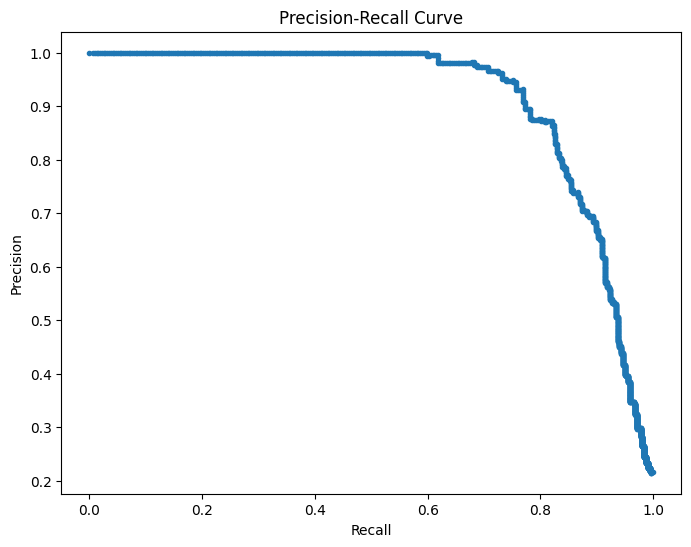

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, model_pipeline.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Construct a ROC curve similar to Figure 3-6, Pg 98.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (1)
y_pred_prob = sgd_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

NameError: ignored

**Discussing whether to use ROC or Precision-Recall Graph**

It depends on the specific characteristics of my classification problem and what I want to prioritize. Each type of curve provides valuable insights into model performance, but they emphasize different aspects of classification.

**ROC Curve (Receiver Operating Characteristic):**

**Use Cases:** ROC curves are commonly used when you have a balanced or nearly balanced dataset where both classes (positive and negative) are equally important. They are well-suited for binary classification problems where the positive and negative classes have a similar prevalence.

**Interpretation:** An ROC curve provides a visual representation of a model's trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) at different probability thresholds. It shows how well the model distinguishes between the two classes across various decision thresholds.

**Performance Metrics:** The area under the ROC curve (AUC-ROC) is a commonly used metric. A higher AUC-ROC value indicates better model performance, especially in scenarios where the cost of false positives and false negatives is roughly equal.

**Precision-Recall (PR) Curve:**

Use Cases: PR curves are more suitable when you have imbalanced datasets, where one class significantly outweighs the other (e.g., fraud detection, rare disease diagnosis). They are especially useful when you want to prioritize precision or when the cost of false positives is much higher than the cost of false negatives.

**Interpretation:** A PR curve illustrates the trade-off between precision and recall (sensitivity) at different decision thresholds. It focuses on how well a model retrieves positive instances while maintaining a high level of precision.

**Performance Metrics:** The area under the PR curve (AUC-PR) is a common metric for PR curves. A higher AUC-PR indicates better model performance, emphasizing the precision-recall trade-off.

Choosing Between ROC and PR Curves:

**Balanced Dataset:** If your dataset is balanced, both ROC and PR curves can be informative. However, in such cases, ROC curves are commonly used because they provide a comprehensive view of the model's performance.

**Imbalanced Dataset:** If you are dealing with an imbalanced dataset where one class is rare, precision-recall curves are often preferred. These curves are better at highlighting the model's performance concerning the minority class, especially in situations where the cost of false positives is high.

**Focus on Specific Metrics:** If you need to evaluate the model based on specific metrics like precision, recall, or F1-score, PR curves may be more appropriate. ROC curves provide a broader view of model performance but may not be as informative for those specific metrics.

In summary, the choice between ROC and PR curves depends on your dataset's class distribution, the importance of false positives vs. false negatives, and the specific metrics you want to emphasize. It's also common to examine both types of curves to gain a more comprehensive understanding of model performance.

After all of the above, evaluate predictions on your test data. This prediction may involve changing a threshold determined from the performance analysis (not necessarily though).
include references to notebooks you used

The optimal threshold that balances your specific trade-off between precision and recall. This threshold can be selected based on your problem requirements and business objectives. For example, you might adjust the threshold to achieve higher precision if minimizing false positives is critical.


In [ ]:
# Get predicted probabilities for the positive class
y_pred_prob = sgd_classifier.predict_proba(X_test)[:, 1]

# Define your adjusted threshold
adjusted_threshold = 0.6  # Adjust this based on your analysis

# Apply the threshold to classify instances
y_pred_adjusted = (y_pred_prob > adjusted_threshold).astype(int)


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate adjusted predictions
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_score_adjusted = f1_score(y_test, y_pred_adjusted)
confusion_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Print or visualize the evaluation results
print("Adjusted Accuracy:", accuracy_adjusted)
print("Adjusted Precision:", precision_adjusted)
print("Adjusted Recall:", recall_adjusted)
print("Adjusted F1 Score:", f1_score_adjusted)
print("Adjusted Confusion Matrix:")
print(confusion_matrix_adjusted)

NameError: ignored